# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL for GET requests to retrieve vehicle data
url = url = f'https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q='


In [4]:
# Print the response object to the console
print(requests.get(url))

<Response [400]>


In [5]:
# Retrieving data and converting it into JSON
print(requests.get(url).json())

{'cod': '400', 'message': 'Nothing to geocode'}


In [6]:
# Pretty Print the output of the JSON
response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "cod": "400",
    "message": "Nothing to geocode"
}


In [7]:
#API Call Requirements "id","name"
#call the stuff with "Begin Data Retrieval"
#for each call use "Processing Record i of Set 1 | City"
#finished will be "Data Retrival Complete"
#need these elements in the DF 
#"City"=city
#"Cloudiness"=["clouds"]["all"
#"Country"=["city"]["country"]
#"Humidity"=["main"]["humidity"]
#"Lat"=["coord"]["lat"]
#"Lng"=["coord"]["lon"]
#"Max_Temp"=["main"]["temp_max"]
#"Wind_Speed"=["wind"]["speed"]






In [8]:
df = pd.DataFrame({"City":[],"Cloudiness":[],"Country":[],
                   "Humidity":[],"Lat":[],"Lng":[],"Max_temp":[],"Wind_speed":[]})

In [11]:
print("Begin Data Retrieval")      
i = 0
for city in cities:
    response_req = requests.get(url+city)
    response = response_req.json()
    if (response['cod'] == 200):
        i = i+1
        print(f'Processing Record {i} of Set 1| {city}')
        print(response_req.url)
        df.loc[i,'City'] = city
        df.loc[i,'Cloudiness'] = response['clouds']['all']
        df.loc[i,'Country'] = response['sys']['country']
        df.loc[i,'Humidity'] = response['main']['humidity']
        df.loc[i,'Lat'] = response['coord']['lat']
        df.loc[i,'Lng'] = response['coord']['lon']
        df.loc[i,'Max_temp'] = response['main']['temp_max']
        df.loc[i,'Wind_speed'] = response['wind']['speed']
    else:
        print('na')

        
print("Data Retrieval Complete")      

Begin Data Retrieval
Processing Record 1 of Set 1| san patricio
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=san%20patricio
Processing Record 2 of Set 1| euclides da cunha
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=euclides%20da%20cunha
Processing Record 3 of Set 1| ushuaia
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=ushuaia
Processing Record 4 of Set 1| hilo
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=hilo
Processing Record 5 of Set 1| ponta do sol
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=ponta%20do%20sol
Processing Record 6 of Set 1| jamestown
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=jamestown
Processing Record 7 of Set 1| p

Processing Record 54 of Set 1| bluff
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=bluff
na
na
Processing Record 55 of Set 1| tessalit
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=tessalit
Processing Record 56 of Set 1| dingle
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=dingle
na
Processing Record 57 of Set 1| whitehorse
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=whitehorse
Processing Record 58 of Set 1| chuy
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=chuy
Processing Record 59 of Set 1| alice springs
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=alice%20springs
Processing Record 60 of Set 1| bredasdorp
https://api.openweathermap.org/da

Processing Record 107 of Set 1| te anau
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=te%20anau
Processing Record 108 of Set 1| korinos
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=korinos
Processing Record 109 of Set 1| coleraine
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=coleraine
Processing Record 110 of Set 1| luderitz
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=luderitz
Processing Record 111 of Set 1| pangnirtung
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=pangnirtung
Processing Record 112 of Set 1| ubinskoye
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=ubinskoye
Processing Record 113 of Set 1| berlevag
https://api.openweathermap.

Processing Record 160 of Set 1| kearney
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=kearney
Processing Record 161 of Set 1| dumas
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=dumas
Processing Record 162 of Set 1| touros
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=touros
Processing Record 163 of Set 1| kenai
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=kenai
Processing Record 164 of Set 1| vao
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=vao
Processing Record 165 of Set 1| burgeo
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=burgeo
Processing Record 166 of Set 1| bay roberts
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862e

Processing Record 213 of Set 1| santiago de chuco
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=santiago%20de%20chuco
Processing Record 214 of Set 1| phuket
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=phuket
Processing Record 215 of Set 1| norman wells
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=norman%20wells
Processing Record 216 of Set 1| anchorage
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=anchorage
Processing Record 217 of Set 1| lorengau
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=lorengau
Processing Record 218 of Set 1| lemoore
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=lemoore
Processing Record 219 of Set 1| lasa
https://api

Processing Record 266 of Set 1| zernograd
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=zernograd
Processing Record 267 of Set 1| okhotsk
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=okhotsk
na
Processing Record 268 of Set 1| boende
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=boende
Processing Record 269 of Set 1| samarai
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=samarai
Processing Record 270 of Set 1| georgetown
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=georgetown
Processing Record 271 of Set 1| sedalia
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=sedalia
Processing Record 272 of Set 1| hamina
https://api.openweathermap.org/data/2.

Processing Record 320 of Set 1| saint-dizier
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=saint-dizier
Processing Record 321 of Set 1| mitsamiouli
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=mitsamiouli
Processing Record 322 of Set 1| maniitsoq
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=maniitsoq
Processing Record 323 of Set 1| puerto el triunfo
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=puerto%20el%20triunfo
Processing Record 324 of Set 1| saint george
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=saint%20george
Processing Record 325 of Set 1| sasvad
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=sasvad
Processing Record 326 of Set 1| 

na
Processing Record 373 of Set 1| havoysund
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=havoysund
Processing Record 374 of Set 1| uhlove
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=uhlove
Processing Record 375 of Set 1| caranavi
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=caranavi
na
Processing Record 376 of Set 1| lady lake
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=lady%20lake
Processing Record 377 of Set 1| roebourne
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=roebourne
Processing Record 378 of Set 1| tadine
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=tadine
Processing Record 379 of Set 1| hornepayne
https://api.openweathermap.

Processing Record 426 of Set 1| walvis bay
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=walvis%20bay
Processing Record 427 of Set 1| karaidel
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=karaidel
Processing Record 428 of Set 1| porkhov
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=porkhov
Processing Record 429 of Set 1| sinnamary
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=sinnamary
Processing Record 430 of Set 1| tifton
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=tifton
Processing Record 431 of Set 1| alexandria
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=alexandria
Processing Record 432 of Set 1| kharovsk
https://api.openweathermap.or

Processing Record 480 of Set 1| saldanha
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=saldanha
Processing Record 481 of Set 1| hunchun
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=hunchun
Processing Record 482 of Set 1| laguna
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=laguna
Processing Record 483 of Set 1| oktyabrskiy
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=oktyabrskiy
Processing Record 484 of Set 1| tateyama
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=tateyama
Processing Record 485 of Set 1| grand gaube
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=grand%20gaube
Processing Record 486 of Set 1| honiara
https://api.openweathermap.o

Processing Record 533 of Set 1| guane
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=guane
Processing Record 534 of Set 1| arlit
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=arlit
Processing Record 535 of Set 1| clonakilty
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=clonakilty
Processing Record 536 of Set 1| cairns
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=cairns
Processing Record 537 of Set 1| rena
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=rena
na
Processing Record 538 of Set 1| korablino
https://api.openweathermap.org/data/2.5/weather?APPID=f3e22b862ed7ef25eb37653f5e987e3e&units=imperial&q=korablino
Processing Record 539 of Set 1| hojai
https://api.openweathermap.org/data/2.5/weather?APPID

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
df.to_csv('cityData.csv')
df.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Max_temp,Wind_speed
1,san patricio,68.0,PY,84.0,-26.98,-56.83,77.44,4.29
2,euclides da cunha,32.0,BR,86.0,-10.51,-39.01,72.62,5.75
3,ushuaia,75.0,AR,80.0,-54.81,-68.31,39.20,20.80
4,hilo,90.0,US,88.0,19.71,-155.08,66.99,3.36
5,ponta do sol,68.0,BR,95.0,-20.63,-46.00,64.57,2.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

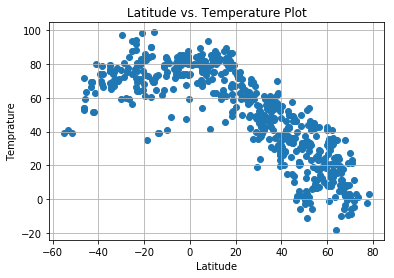

In [13]:
plt.figure()
plt.scatter(df['Lat'],df['Max_temp'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Temprature')
plt.title(f"Latitude vs. Temperature Plot")
plt.savefig('LatitudevsTemperaturePlot.png')

#### Latitude vs. Humidity Plot

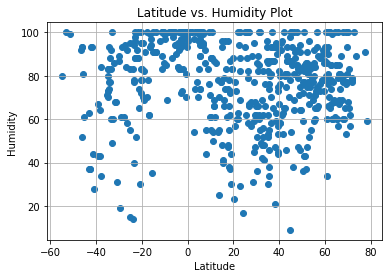

In [19]:
plt.figure()
plt.scatter(df['Lat'],df['Humidity'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"Latitude vs. Humidity Plot")
plt.savefig('LatitudevsHumidityPlot.png')

#### Latitude vs. Cloudiness Plot

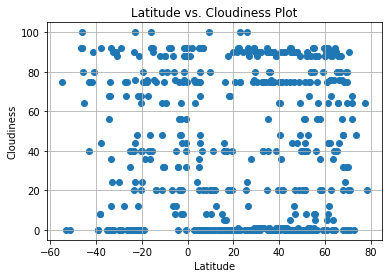

In [18]:
plt.figure()
plt.scatter(df['Lat'],df['Cloudiness'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"Latitude vs. Cloudiness Plot")
plt.savefig('LatitudevsCloudinessPlot.png')

#### Latitude vs. Wind Speed Plot

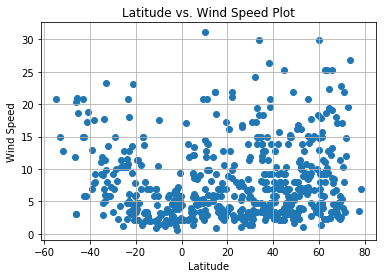

In [17]:
plt.figure()
plt.scatter(df['Lat'],df['Wind_speed'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f"Latitude vs. Wind Speed Plot")
plt.savefig('LatitudevsWindSpeedPlot.png')